# HW 4
### Allison Pham - apham206

# Goodreads Books

Goodreads is a platform for readers to interact with other users on the topic of books, where they can share manage and share their experience. Individuals can organize their to be read (TBR) list, keep track of current books they are reading, and note which books they have completed. In addition, Goodreads allows users to make and receive book recommendations, write reviews, and remain updated with their friends' reading progress. To understand the user-interface better, those interested in diving deeper into Goodreads can access it on a laptop or mobile device.

### The data examined will consist of data relating to Goodreads features that help categorize and sort books:
- Each book will be identified through different identifiers (book ID, ISBN, 13-digit ISBN)
- Title and author name
- Average rating and the total number of ratings (rating count)
- Language code (the primary language the book is written in)
- Number of pages (total page count)

Link to dataset: [Goodreads Books](https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks/data)

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [145]:
books_df = pd.read_csv('books.csv', on_bad_lines = 'skip')
    # ParseError fixed
    
books_df.columns = books_df.columns.str.strip()
books_df['publication_year'] = pd.to_datetime(books_df['publication_date'], errors = 'coerce').dt.year

books_df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004.0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003.0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004.0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,2004.0
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,1988.0
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,1993.0
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,2007.0


## Question 1: How does number of pages correlate with its popularity amongst readers?

In order to get the data to compare the correlation between number of pages and ratings count, compare the two columns from 'books.csv'.<br>
Create a scatter plot to compare correlation between the two columns and calculate the correlation coefficient, where values 0.3 and higher or -0.3 and lower indicates a correlation.<br>

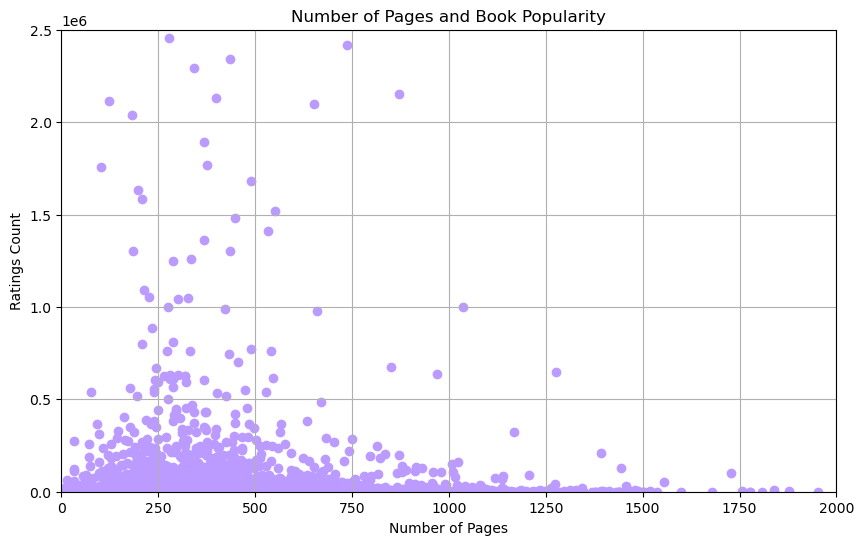

Correlation coefficient:  0.03


In [123]:
# https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

plt.figure(figsize = (10, 6))
plt.scatter(books_df['num_pages'], books_df['ratings_count'], color = '#BB9BFF')

# Labels
plt.title("Number of Pages and Book Popularity")
plt.xlabel("Number of Pages")
plt.ylabel("Ratings Count")

# Sizing
plt.grid(True)
plt.xlim(0, 2000) # 2,000
plt.ylim(0, 2500000) # 2,500,000
    # Set the range for x and y
plt.show()

# Correlation
correlation = books_df['num_pages'].corr(books_df['ratings_count'])
print(f"Correlation coefficient: {correlation: 0.2f}")

Books that are less than 1,000 pages have a higher rating count than books that are greater than that amount. However, the correlation coefficient, 0.03, indicates that there is a weak correlation between the number of pages and the rating count.

A few factors that might have played a role in impacting the correlation by some degree is the frequency of longer vs. shorter books, book and author popularity, genre, and marketability. Meaning, the correlation, might be slightly stronger, not necessarily -1 or 1, but rather, more accurate in terms of its calculations.

Although there is a small indication that shorter boks have higher rating count, the correlation is not strong enough, thus demonstrating that various factors play a role influencing the outcome.

## Question 2: Which publication year has the highest number of books published for this data set?

Convert the publication date (mm/dd/yy) to years to compare solely the year.<br>
Then, specify a range of years due to outliers that do not fall within a certain range.<br>
Afterwards, create two graphs that demonstrate the original graph and the more specific graph.

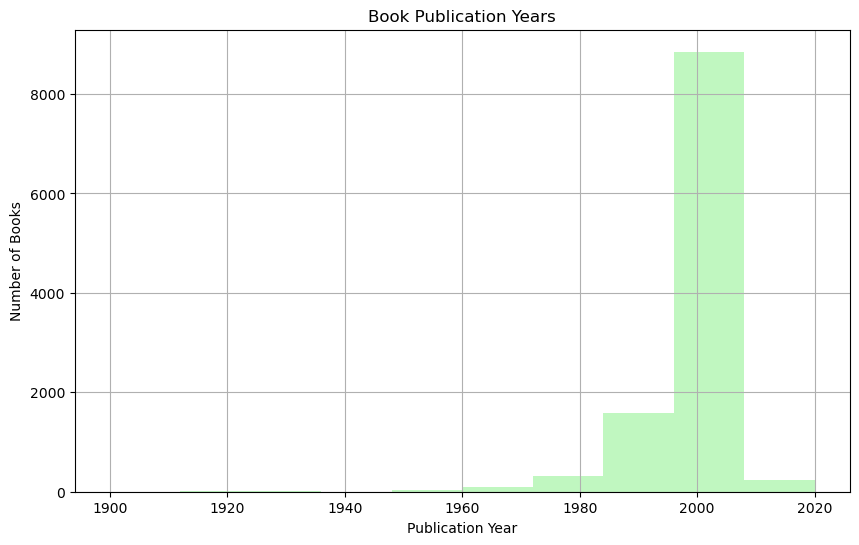

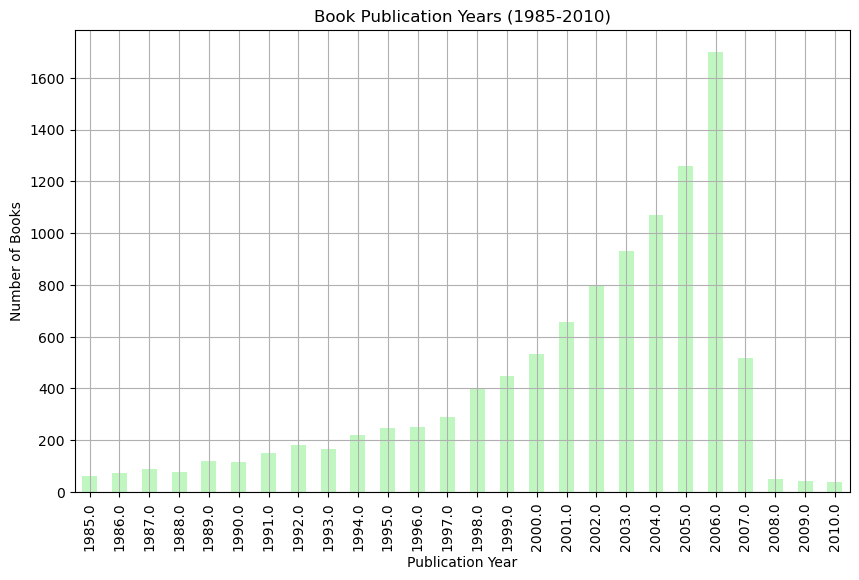

Year with most books published: 2006


In [148]:
# https://geeksforgeeks.org/python-pandas-series-dt-year
# https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_index.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
    # errors

# Get year from 'publication_date'
    # ValueError

booksPerYear = books_df['publication_year'].value_counts()

# Filter
rangeOfYears = {} # dict
for year, num in books_per_year.items():
    if 1985 <= year <= 2010:
        rangeOfYears[year] = num

selected_years_series = pd.Series(rangeOfYears)

# 1st Graph
plt.figure(figsize = (10, 6))
plt.hist(books_df['publication_year'], color = '#C0F7C0')

# Labels
plt.title("Book Publication Years")
plt.xlabel("Publication Year")
plt.ylabel("Number of Books")

plt.grid(True)
plt.show()


# 2nd Graph
plt.figure(figsize = (10, 6))
selected_years_series.sort_index().plot(kind = 'bar', color = '#C0F7C0')
# plt.hist(books_df['publication_year'], color = '#C0F7C0')

# Labels
plt.title("Book Publication Years (1985-2010)")
plt.xlabel("Publication Year")
plt.ylabel("Number of Books")

plt.grid(True)
plt.show()

print("Year with most books published: 2006")

The graphs demonstrate that the publication year that had the most books published. The second graph indicates an upward trend from 1985 to 2006, but immediately drops in 2007.

A potential accuracy that may have occured in 'books.csv' is the specific data that the creator of the data set collected. Meaning, a large proportion of the books they gathered were from a specific range of years (2000-2006).

The first graph takes into account all the books in the data set, whereas the second one provides a more precise viewing of the trends viewed in 'books.csv'. The second one allows for further insight in terms of which exact year had the most published books.

## Question 3: Does a correlation exist between the amount of ratings and text reviews?

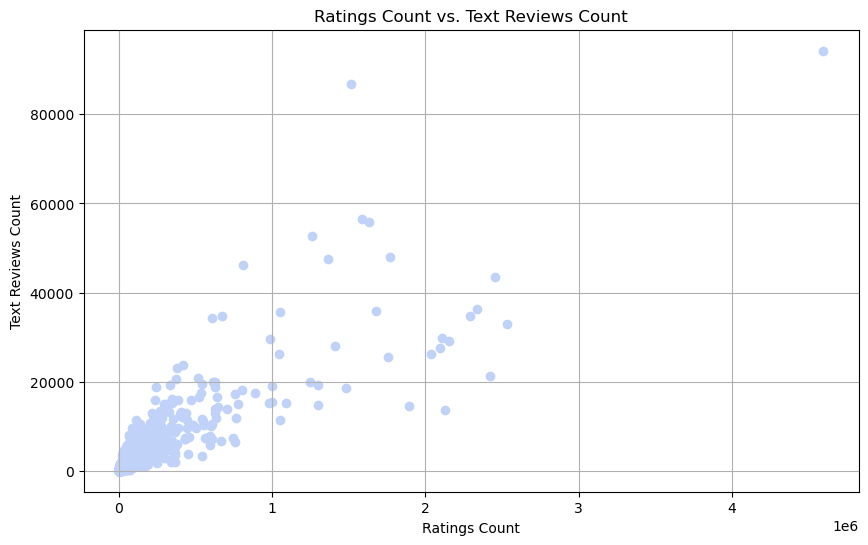

Correlation coefficient:  0.87


In [150]:
plt.figure(figsize = (10, 6))
plt.scatter(books_df['ratings_count'], books_df['text_reviews_count'], color = '#C0D2F7')

plt.title("Ratings Count vs. Text Reviews Count")
plt.xlabel("Ratings Count")
plt.ylabel("Text Reviews Count")

plt.grid(True)
plt.show()

correlation = books_df['ratings_count'].corr(books_df['text_reviews_count'])
print(f"Correlation coefficient: {correlation: 0.2f}")

The graph indicates and correlation coefficient, 0.87, indicates that the higher the rating count, the higher the text reviews count. There is a strong correlation, meaning that they are correlated.

Ratings and reviews often go "hand-in-hand," meaning that readers may have demonstrated a similar level of interest when making ratings and reviews.

Even though the correlation was strong, the ratings and text reviews do not directly cause one another. Therefore, the graph demonstrates the connection between the two, rather than its causation.

## Question 4: Is there a relationship between the number of pages in books and lower and upper bounds on the IQR in the data set?

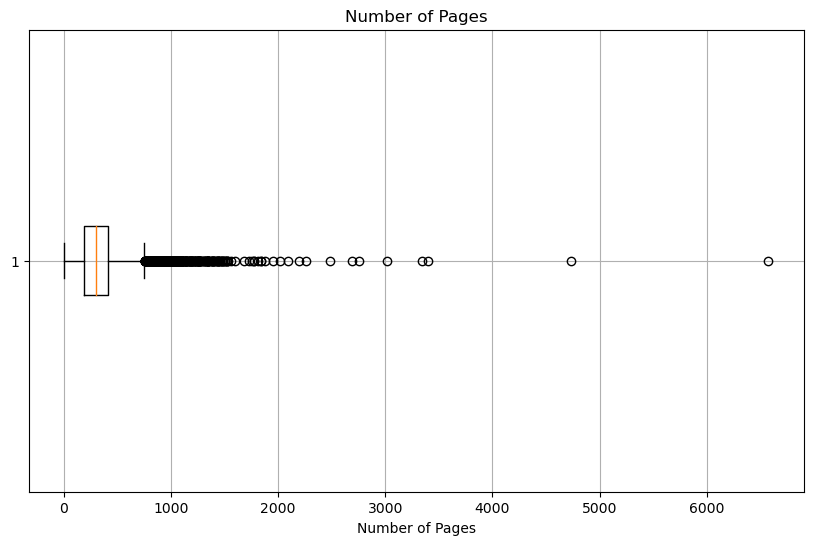

Lower bound: -144.0
Upper bound: 752.0


In [160]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html
# https://python-charts.com/distribution/box-plot-matplotlib/

plt.figure(figsize = (10, 6))
plt.boxplot(books_df['num_pages'], vert = False)
plt.title("Number of Pages")
plt.xlabel("Number of Pages")
plt.grid(True)
plt.show()

q1= books_df['num_pages'].quantile(0.25)
q3 = books_df['num_pages'].quantile(0.75)
iqr = q3 - q1

lowerBound = q1 - 1.5 * IQR
upperBound = q3 + 1.5 * IQR

print(f"Lower bound: {lowerBound}")
print(f"Upper bound: {upperBound}")

The graph focuses on the number of pages and the lower and upper bounds for the IQR.

The lower bound is -144, which is not a valid number in terms of number of pages. However, the upper bound is 752, indicating that books that go above the amount indicate an outlier.

A fair portion of the pages fall within that range.